In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df = pd.read_csv('london.csv')

In [160]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [161]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [163]:
df.isna().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

In [164]:
data = df.loc[:, ['timestamp', 'cnt']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  17414 non-null  datetime64[ns]
 1   cnt        17414 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 272.2 KB


In [165]:
data = data.resample(rule='D', on='timestamp').sum() #способ 2, эквивалентный предыдущему

<AxesSubplot:xlabel='timestamp'>

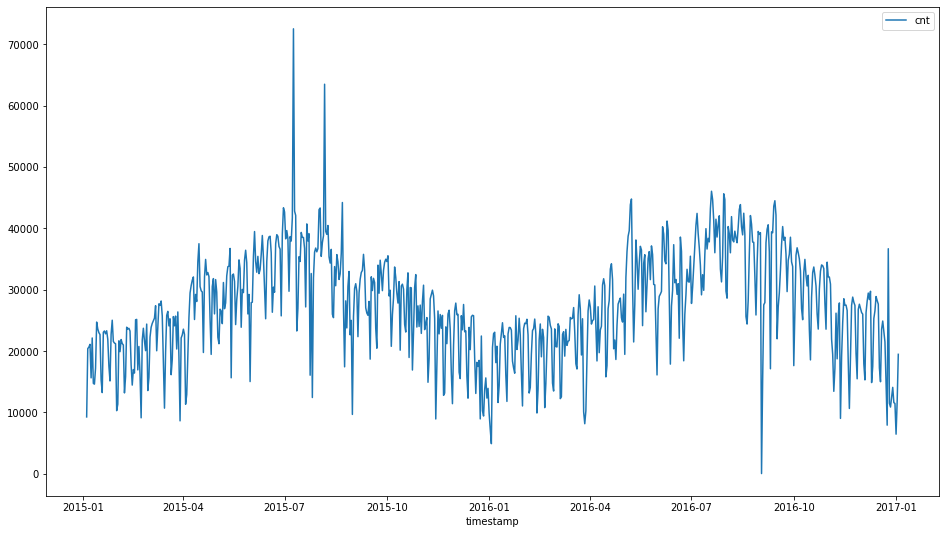

In [166]:
plt.figure(figsize=(16, 9))
sns.lineplot(data=data)

In [167]:
sl_av = data.rolling(window=3).mean()

In [168]:
diff_data = data - sl_av

In [169]:
std = np.std(diff_data).cnt

In [170]:
upper_bound = sl_av + 2.576*std
lower_bound = sl_av - 2.576*std

In [171]:
upper_bound = upper_bound.reset_index()
data = data.reset_index()

In [188]:
lower_bound = lower_bound.reset_index()

In [173]:
upper_bound

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,28482.585854
3,2015-01-07,32425.919188
4,2015-01-08,30835.585854
...,...,...
726,2016-12-30,24424.919188
727,2016-12-31,24090.252521
728,2017-01-01,21546.585854
729,2017-01-02,21632.252521


In [177]:
data_mrg = upper_bound.merge(data, how='outer', indicator=True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1141: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [186]:
data[data.cnt > upper_bound.cnt]

,timestamp,cnt
186,2015-07-09,72504
214,2015-08-06,63468
609,2016-09-04,27512
721,2016-12-25,36653


In [189]:
data[data.cnt < lower_bound.cnt]

,timestamp,cnt
130,2015-05-14,15609
189,2015-07-12,23240
201,2015-07-24,16034
232,2015-08-24,17400
314,2015-11-14,8898
607,2016-09-02,0
615,2016-09-10,17080
621,2016-09-16,21967
678,2016-11-12,8990
